# Eigenvalues, Eigenvectors and PCA

# Power Iteration

## Definition

**Power iteration** is an iterative method for approximating the dominant eigenvalues and eigenvectors of a matrix. 

Two assumptions:
1. The matrix $\bf A$ is diagonalizable and has an eigenvalue that is strictly greater in magnitude than its other eigenvalues;
2. The initial guess of the eigenvector has a non-zero component in the direction of the true eigenvector. 

## Intuition

Based on the first assumption, $\bf A$ is diagonalizable, it has $n$ linearly independent eigenvectors $v_1, ..., v_n$ and corresponding eigenvalues $\lambda_1, ..., \lambda_n$. Let's assume they are aranged in descent order, namely, $v_1, \lambda_1$ being dominant.

- Because the eigenvectors are independent, they form a set of basis vectors. Therefor, for any vector $x_0$ can be written as a linear combination of the basis vectors:
$$ x_0 = c_1v_1+c_2v_2+\dots+c_nv_n$$
where $c_1\ne 0$ (assumption 2). If it is zero, then we need to choose another initial vector. 


- Now, multiply both sides by $A$:
$$ Ax_0 = c_1Av_1+c_2Av_2+\dots+c_nAv_n$$
Since $Av_i = \lambda{v_i}$, we get:
$$ Ax_0 = c_1\lambda_1v_1+c_2\lambda_2v_2+\dots+c_n\lambda_nv_n$$
rewrite the above equation:
$$ Ax_0 = c_1\lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n}{\lambda_1}v_n]= c_1\lambda_1x_1$$
Usually, in order to gaurantee convergence, we need to scale down the vector (e.g. by normalizing it). Here, for simplicity, we devide the vector by the largest eigenvalue $\lambda_1$ and $c_1$.
Then, $x_1$ is a new vector and $x_1 = v_1+\frac{c_2}{c_1}\frac{\lambda_2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n}{\lambda_1}v_n$.

- We repeat that $k$ times. E.g. in the 2nd iteration, we multiply $A$ to $x_1$ and get:
$$ Ax_1 = \lambda_1{v_1}+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1}v_n $$
rearrange the above equation to
$$ Ax_1 = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n] = \lambda_1x_2$$
and scale down to get the new vector $x_2 = v_1+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n$.

- After $k$ iterations, we have:
$$ Ax_{k-1} = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n] = \lambda_1x_k$$
Because $\lambda_1$ is the largest eigenvalue, therefore, the ratio $\left (\dfrac{\lambda_i}{\lambda_1}\right )^k \to 0$ as $k\to \infty$. So that all the terms that contain this ratio can be neglected as $k$ approaches infinity, and finally we have:
$$ Ax_{k-1} = {\lambda_1}v_1, \quad k\to\infty $$

In [1]:
# Import the required modules
import numpy as np
!pip install rich

from rich.console import Console
console = Console()

## Implementation

In [2]:
def power_iteration(mat: np.ndarray, tolerance: float = 1e-10, max_iterations: int = 1000):
    # initialize the eigenvalue and eigenvector
    eigen_vec = np.random.randn(mat.shape[0])
    eigen_val_prev = np.linalg.norm(eigen_vec)
    eigen_vec /= eigen_val_prev
    
    for i in range(max_iterations):
        # compute the eigenvector and eigenvalue  x = Ax
        eigen_vec = np.dot(mat, eigen_vec)
        eigen_val = np.linalg.norm(eigen_vec)
        
        # Normalize the eigenvector (otherwise, not converging)
        eigen_vec /= eigen_val
        
        # Av = 𝜆v
        if np.linalg.norm(mat.dot(eigen_vec) - eigen_val * eigen_vec) < tolerance:
            console.print(f"[green]converge at step {i+1}")
            break
        eigen_val_prev = eigen_val
    
    return eigen_val, eigen_vec

In [3]:
A = np.array([[1, 9, 8], [2, 7, 6], [7, 20, 9]])
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

eigen_val, eigen_vec = power_iteration(A)

console.rule("[blue] the largest eigenvalue and eigenvector")
console.print("Eigenvalue: \n", eigen_val)
console.print("Eigenvector: \n", eigen_vec)

converge at step 15

─────────────────────────────────────  the largest eigenvalue and eigenvector ─────────────────────────────────────

Eigenvalue: 
 22.325587651432734

Eigenvector: 
 [0.46017333 0.37509519 0.80470125]

**Using `np.linalg.eig` library**

In [4]:
eigen_val, eigen_vec = np.linalg.eig(A)

console.print("Eigenvalue: \n", abs(eigen_val))
console.print("Eigenvector: \n", eigen_vec.T)

Eigenvalue: 
 [22.32558765  0.87573002  4.44985763]

Eigenvector: 
 [[-0.46017333 -0.37509519 -0.80470125]
 [-0.84332165  0.44438763 -0.30220562]
 [-0.62115879 -0.27588126  0.73351979]]

## Inverse Power Iteration

**Find the smallest eigenvalue and the associated eigenvectors**

$$\mathbf{Ax} = \lambda \mathbf{x}  \Longleftrightarrow \mathbf{A}^{-1}\mathbf{x} = \dfrac{1}{\lambda}\mathbf{x}$$

In [5]:
def inverse_power_iteration(mat: np.ndarray, tolerance: float = 1e-10, max_iterations: int = 1000):
    
    # initialize the eigenvalue and eigenvector
    eigen_vec = np.random.randn(mat.shape[0])
    eigen_val_prev = np.linalg.norm(eigen_vec)
    eigen_vec /= eigen_val_prev
    
    for i in range(max_iterations):
        # compute the eigenvector and eigenvalue x = A^-1 x
        eigen_vec = np.linalg.solve(mat, eigen_vec)
        eigen_val = np.linalg.norm(eigen_vec)
        
        # Normalize the eigenvector (otherwise, not converging)
        eigen_vec /= eigen_val
        
        if np.linalg.norm(mat.dot(eigen_vec) - eigen_val * eigen_vec) < tolerance:
            console.print(f"[green]converge at step {i+1}")
            break

        eigen_val_prev = eigen_val
    
    return 1./eigen_val, eigen_vec

In [6]:
A = np.array([[1, 9, 8], [2, 7, 6], [7, 20, 9]])
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

eigen_val, eigen_vec = inverse_power_iteration(A)

console.rule("[blue] the smallest eigenvalue and eigenvector")
console.print(f"Eigenvalue: {eigen_val:>0.5f} Eigenvector: {eigen_vec}")

────────────────────────────────────  the smallest eigenvalue and eigenvector ─────────────────────────────────────

Eigenvalue: 0.87573 Eigenvector: [ 0.84332165 -0.44438763  0.30220562]

## The shifted power method

Eigenvectors are not affected by shifts. Suppose $\bf Ax = \lambda x$, and we shift the matrix $\bf A$ by value $s$:
$$(\mathbf{A} - s\mathbf{I})\cdot \mathbf{x} = \mathbf{Ax} - s\mathbf{x} = \lambda\mathbf{x} - s\mathbf{x} = (\lambda - s)\mathbf{x}$$
So, the shifted matrix has eigenvalue $\lambda+s$, and the eigenvectors remain the same.

In [7]:
def shifted_inverse_power_iteration(mat, shift, tolerance=1e-3, max_iterations=1000):
    mat = mat - shift * np.identity(mat.shape[0])
    return inverse_power_iteration(mat, tolerance, max_iterations)

In [9]:
A = np.array([[1, 9, 8], [2, 7, 6], [7, 20, 9]])
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

shift = 4
eigen_val, eigen_vec = shifted_inverse_power_iteration(A, -shift)
console.rule("[blue] smallest eigenvalue and eigen vector")
console.print(f"Eigenvalue: {eigen_val+shift:>0.5f} Eigenvector: {eigen_vec}")

──────────────────────────────────────  smallest eigenvalue and eigen vector ──────────────────────────────────────

Eigenvalue: 4.44986 Eigenvector: [ 0.62115879  0.27588126 -0.73351979]

## compute all eigenvalues of symmetric matrix

check book https://mml-book.github.io/book/mml-book.pdf (page 322 - 324)

In [10]:
def power_iteration_projection(mat: np.ndarray, tolerance: float = 1e-10, max_iterations: int = 1000):
    eigen_vals = []
    eigen_vecs = []
    
    dim = mat.shape[1]
    B = np.zeros((dim, dim), dtype=float)

    for i in range(dim):
        mat_ = mat - mat.dot(B) - B.dot(mat) + B.dot(mat).dot(B)
        eigen_val, eigen_vec = power_iteration(mat_)
        console.print(f"[blue]{i}-th iter: Eigenvalue: {eigen_val} Eigenvector: {eigen_vec}")
        eigen_vals.append(eigen_val)
        eigen_vecs.append(eigen_vec)
                
        B += eigen_vec.reshape(-1, 1) * eigen_vec.reshape(1, -1)
        

    console.rule("[blue]done")
    return np.array(eigen_vals), np.array(eigen_vecs)

In [11]:
A = np.array([[1, 9, 8], [2, 7, 6], [7, 20, 9]])
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])
A = A.T.dot(A)

eigen_vals, eigen_vecs = power_iteration_projection(A)
console.print("Eigenvalue: \n", eigen_vals)
console.print("Eigenvector: \n", eigen_vecs)

converge at step 9

0-th iter: Eigenvalue: 745.6616729724772 Eigenvector: [-0.25544215 -0.8416598  -0.47577105]

converge at step 8

1-th iter: Eigenvalue: 18.798347863277737 Eigenvector: [-0.51487977 -0.29808671  0.80376809]

converge at step 2

2-th iter: Eigenvalue: 0.5399791642452018 Eigenvector: [-0.81832031  0.45028114 -0.35720969]

────────────────────────────────────────────────────── done ───────────────────────────────────────────────────────

Eigenvalue: 
 [7.45661673e+02 1.87983479e+01 5.39979164e-01]

Eigenvector: 
 [[-0.25544215 -0.8416598  -0.47577105]
 [-0.51487977 -0.29808671  0.80376809]
 [-0.81832031  0.45028114 -0.35720969]]

In [12]:
eigen_val, eigen_vec = np.linalg.eig(A)

console.print("Eigenvalue: \n", abs(eigen_val))
console.print("Eigenvector: \n", eigen_vec.T)

Eigenvalue: 
 [7.45661673e+02 5.39979164e-01 1.87983479e+01]

Eigenvector: 
 [[-0.25544215 -0.8416598  -0.47577105]
 [-0.81832031  0.45028114 -0.35720969]
 [-0.51487977 -0.29808671  0.80376809]]

# Plane Fitting

In this example, we will use Singular Value Decomposition to fit a plane to a noisy 3D point cloud. 

In [13]:
# Import the required modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

!pip install transforms3d --upgrade
import transforms3d as tf3d


In [14]:
# Enable interactive 3D plots in Jupyter.

%matplotlib notebook

First, we define some utility functions:

In [16]:
def quat_from_to(v1: np.ndarray, v2: np.ndarray):
    """Get a quaternion rotating vector v1 to v2 in [w x y z] format."""
    quat = np.array([1., 0., 0., 0.])
    quat[1:] = np.cross(v1, v2)
    quat[0] = np.sqrt((np.linalg.norm(v1) ** 2) * (np.linalg.norm(v2) ** 2)) + np.dot(v1, v2)
    return quat



def transform_point(tf_mat4x4: np.ndarray, vector_3):
    """Transform a 3D position by a 4x4 affine transformation matrix."""
    return (tf_mat4x4 @ np.concatenate([vector_3, [1]]))[:3]



def get_plane_tf_mat(normal: np.ndarray, offset: np.ndarray) -> np.ndarray:
    """Get the transformation from XY plane coordinates to 3D XYZ coordinates."""
    translation = offset * normal

    rot_quat = quat_from_to([0., 0., 1.], normal)
    rot_mat = tf3d.quaternions.quat2mat(rot_quat)

    tf_mat = tf3d.affines.compose(R=rot_mat, T=translation, Z=np.ones(3))
    return tf_mat



def plot_plane(ax: Axes3D, normal, offset, size=10, alpha=0.5, color=None):
    """Plot a plane as quad in 3D."""
    points = np.array([[[size, size, 0], [-size, size, 0]],
                       [[size, -size, 0], [-size, -size, 0]]])

    tf_mat = get_plane_tf_mat(normal, offset)
    points_tf = np.apply_along_axis(lambda x: transform_point(tf_mat, x), axis=-1, arr=points)

    return ax.plot_surface(*points_tf.T, alpha=alpha, color=color)

Then, we prepare the example:

In [17]:
# Define ground truth plane.
plane_normal_gt = np.array([1, 2, 3])
plane_normal_gt = plane_normal_gt / np.linalg.norm(plane_normal_gt)
plane_offset_gt = 2

console.print("Ground truth plane:")
console.print(f"- normal: {plane_normal_gt}")
console.print(f"- offset: {plane_offset_gt}")
console.print("")

tf_mat_gt = get_plane_tf_mat(plane_normal_gt, plane_offset_gt)
console.print(f"Ground truth transformation matrix:\n{tf_mat_gt}")

Ground truth plane:

- normal: [0.26726124 0.53452248 0.80178373]

- offset: 2

Ground truth transformation matrix:
[[ 0.96035675 -0.07928651  0.26726124  0.53452248]
 [-0.07928651  0.84142698  0.53452248  1.06904497]
 [-0.26726124 -0.53452248  0.80178373  1.60356745]
 [ 0.          0.          0.          1.        ]]

Preparing 3D plot


<IPython.core.display.Javascript object>


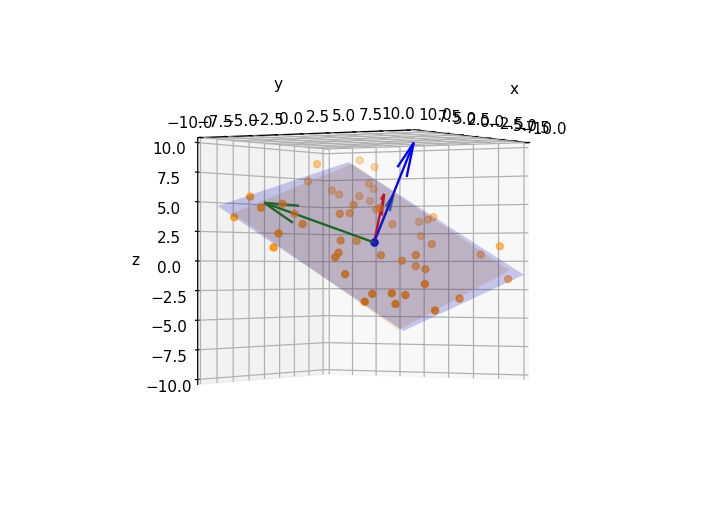

In [38]:
# Prepare the 3D plot.
print("Preparing 3D plot")
fig: plt.Figure = plt.figure()
ax: Axes3D = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_box_aspect((1, 1, 1))
fig.show()

In [39]:
do_vis_ground_truth = True
if do_vis_ground_truth:
    # Visualize ground truth plane.
    print("Visualizing ground truth plane")
    plane_origin_gt = transform_point(tf_mat_gt, [0, 0, 0])

    plot_plane(ax, plane_normal_gt, plane_offset_gt, size=9, alpha=0.2, color="orange")
    ax.scatter(*plane_origin_gt)
    ax.quiver(*plane_origin_gt, *plane_normal_gt, length=5)

Visualizing ground truth plane


In [30]:
# Generate data
noise_mean = 0.0
noise_std = 1.0
num = 50
print("Generating data (noise: {:.2f}+-{:.2f}, num: {})".format(noise_mean, noise_std, num))

# Generate uniform X, Y (positions on plane) and Gaussian Z data (noise)
data_plane = np.stack([np.random.uniform(-10, 10, size=num) for i in range(2)]
                      + [np.random.normal(noise_mean, scale=noise_std, size=num)])
data = np.apply_along_axis(lambda x: transform_point(tf_mat_gt, x), axis=0, arr=data_plane)
print("- Generated data matrix: {}".format(data.shape))  # (3, num)

Generating data (noise: 0.00+-1.00, num: 50)
- Generated data matrix: (3, 50)


In [40]:
do_vis_data = True
if do_vis_data:
    ax.scatter(*data, color="darkorange")

Now, we perform the plane estimation:

## Using power iteration method

check book https://mml-book.github.io/book/mml-book.pdf (page 322 - 324)

In [32]:
def pca_power_iteration(data: np.ndarray, tolerance: float = 1e-3, max_iterations: int = 1000):
    """
    data: (n_samples, dim)
    """
    eigen_vals = []
    eigen_vecs = []

    dim = data.shape[1]
    mean = data.mean(axis=0, keepdims=True)
    data = data - mean

    for i in range(dim):
        mat = data.T.dot(data)
        eigen_val, eigen_vec = power_iteration(mat)
        eigen_vals.append(eigen_val)
        eigen_vecs.append(eigen_vec)
        # remove contribution of the previous components
        data = data - data.dot(eigen_vec).reshape(-1, 1) * eigen_vec.reshape(1, -1)

    return mean, np.array(eigen_vals), np.array(eigen_vecs)

In [33]:
mean, eigen_val, eigen_vec = pca_power_iteration(data.T)
console.print(f"mean: \n{mean}")
console.print(f"eigen_val: \n{eigen_val}")
console.print(f"eigen_vec: \n{eigen_vec}")
console.print("Ground truth plane:")
console.print(f"- normal: {plane_normal_gt}")
console.print(f"- offset: {plane_offset_gt}")

plane_x_est, plane_y_est, plane_normal_est = eigen_vec[0], eigen_vec[1], eigen_vec[2]
plane_offset_est = np.dot(mean, plane_normal_est)

converge at step 109

converge at step 8

converge at step 2

mean: 
[[-0.23716578  0.26007757  2.38770211]]

eigen_val: 
[2025.9318035  1529.75188962   28.7600556 ]

eigen_vec: 
[[-0.81782633 -0.36414294  0.44560074]
 [-0.53032018  0.77754711 -0.3379068 ]
 [-0.22342919 -0.51266014 -0.82901084]]

Ground truth plane:

- normal: [0.26726124 0.53452248 0.80178373]

- offset: 2

In [37]:
do_vis_estimated = True
if do_vis_estimated:
    print("Visualizing estimated plane")
    tf_mat_est = get_plane_tf_mat(plane_normal_gt, plane_offset_gt)
    plane_origin_est = transform_point(tf_mat_est, [0, 0, 0])

    plot_plane(ax, normal=plane_normal_est, offset=plane_offset_est, color="blue", alpha=0.4)
    ax.scatter(*plane_origin_est, color="blue")
    ax.quiver(*plane_origin_est, *plane_normal_est * 1.5, length=5, color="blue")

    ax.quiver(*plane_origin_est, *plane_x_est * 1.5, length=5, color="red")
    ax.quiver(*plane_origin_est, *plane_y_est * 1.5, length=5, color="green")

Visualizing estimated plane


## Using SVD from Numpy library

In [41]:
# Estimate plane
print("Estimating plane")

# Find centroid and subtract from data
print("- Computing centroid")
centroid_est = np.mean(data, axis=1)
data_zero_mean = (data.T - centroid_est).T

# Perform SVD to find normal
print("- Performing SVD")
u, s, vh = np.linalg.svd(data_zero_mean, full_matrices=True, compute_uv=True)
# Best normal is left singular vector of least singular value.
plane_x_est, plane_y_est, plane_normal_est = u[:, 0], u[:, 1], u[:, 2]
plane_offset_est = np.dot(centroid_est, plane_normal_est)

print("Estimated plane:")
print("- normal:", plane_normal_est)
print("- offset:", plane_offset_est)
print("Ground truth plane:")
print(f"- normal: {plane_normal_gt}")
print(f"- offset: {plane_offset_gt}")

Estimating plane
- Computing centroid
- Performing SVD
Estimated plane:
- normal: [0.22342919 0.51266014 0.82901084]
- offset: 2.059772579259934
Ground truth plane:
- normal: [0.26726124 0.53452248 0.80178373]
- offset: 2


In [42]:
do_vis_estimated = True
if do_vis_estimated:
    print("Visualizing estimated plane")
    tf_mat_est = get_plane_tf_mat(plane_normal_gt, plane_offset_gt)
    plane_origin_est = transform_point(tf_mat_est, [0, 0, 0])

    plot_plane(ax, normal=plane_normal_est, offset=plane_offset_est, color="blue", alpha=0.2)
    ax.scatter(*plane_origin_est, color="blue")
    ax.quiver(*plane_origin_est, *plane_normal_est * 2.0, length=5, color="blue")

    ax.quiver(*plane_origin_est, *plane_x_est * 2.0, length=5, color="red")
    ax.quiver(*plane_origin_est, *plane_y_est * 2.0, length=5, color="green")

Visualizing estimated plane


## Link to robotics

What other type of **geometric primitives** can we extract from data?

Geometric constraint estimation for a insertion task. Human experts demonstrate several times to accomplish the task. The demonstrations are recorded as RGB-D videos. A pretrained correspondence detection model is used to detect dense correspondences between arbitrary two images. The robot observes the motion and learn geometric constraints from the visual demonstrations.

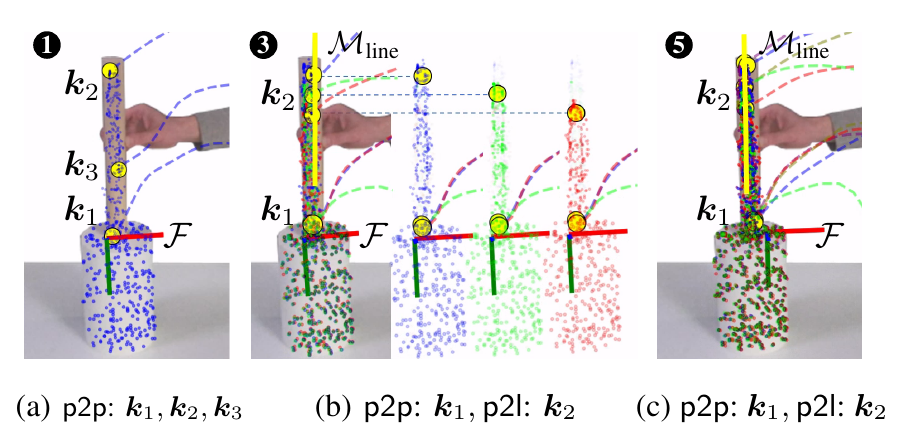

Reproduction of the learned skill and generalization to unsceen cases. 

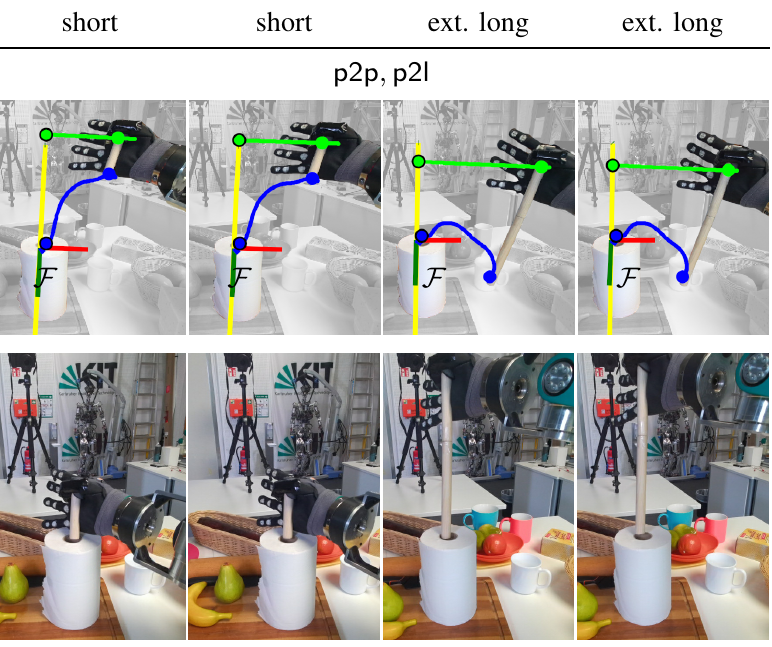

Interested in this topic? You can find more details in the paper https://h2t.anthropomatik.kit.edu/pdf/Gao2022.pdf.

# PCA for Dimensionality Reduction

Analyzing breast cancer dataset using PCA.

In [43]:
from sklearn import datasets
from sklearn.decomposition import PCA
data = datasets.load_breast_cancer()
console.print(f"data shape: {data.data.shape}")
console.print(f"feature_names: {data.feature_names}")
console.print(f"categories: {np.unique(data.target)}")

data shape: (569, 30)

feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

categories: [0 1]

plot the data **with** and **without** class labels.

In [44]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data.data) # normalizing the features
np.mean(x),np.std(x)

(-6.118909323768877e-16, 1.0)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_breast_cancer = pca.fit_transform(x)
console.print(pca_breast_cancer[:5])

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 [ 7.1229532  10.27558912]
 [ 3.93530207 -1.94807157]]

**Explained variance**:

In [46]:
console.print(f"[blue]explained variance is {pca.explained_variance_ratio_}")
console.print(f"[blue]the first two components explains {pca.explained_variance_ratio_.sum() * 100:>.2f}% of the information in total")
console.print(f"[red]and {(1-pca.explained_variance_ratio_.sum()) * 100:>.2f}% information is lost")

explained variance is [0.44272026 0.18971182]

the first two components explains 63.24% of the information in total

and 36.76% information is lost

The results indicate that the 1st principal component explains about 44.27% of the information in the data while the 2nd principal component only explains 18.97% of the information. Note that, by projecting 30-dimensional data to a 2-dimensional space, we lost 36.76% information was lost.

<IPython.core.display.Javascript object>


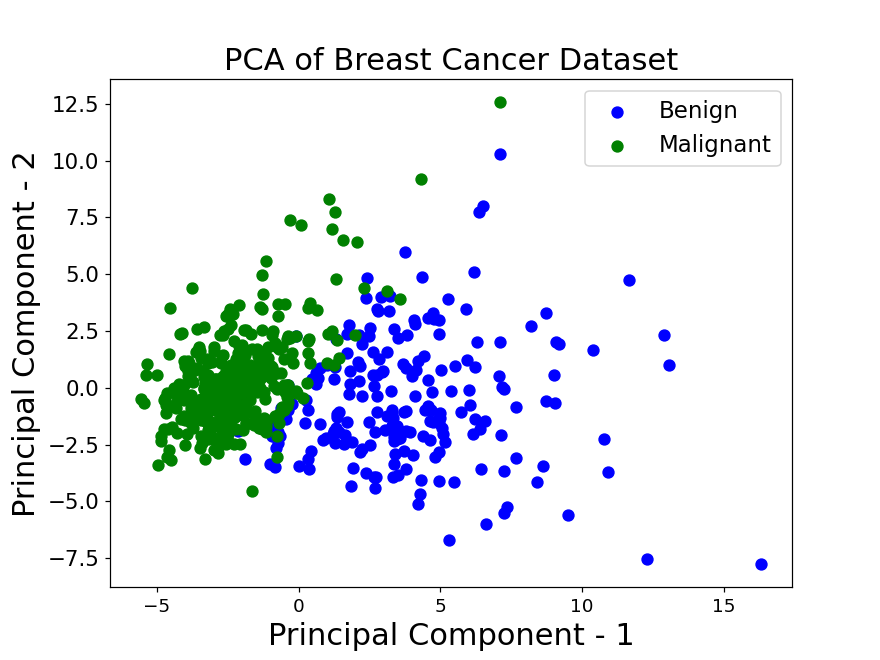

In [47]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'g']
for i in range(2):
    idx = np.where(data.target == i)[0]
    plt.scatter(pca_breast_cancer[idx, 0], pca_breast_cancer[idx, 1], c=colors[i], s=50)

plt.legend(targets,prop={'size': 15})
plt.show()

In [48]:
from sklearn.decomposition import PCA
n_components=12
pca = PCA(n_components=n_components)
pca_breast_cancer = pca.fit_transform(x)
console.print(f"[blue]explained variance is {pca.explained_variance_ratio_}")
console.print(f"[blue]the first {n_components} components explains {pca.explained_variance_ratio_.sum() * 100:>.2f}% of the information in total")
console.print(f"[red]and {(1-pca.explained_variance_ratio_.sum()) * 100:>.2f}% information is lost")

explained variance is [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538]

the first 12 components explains 97.01% of the information in total

and 2.99% information is lost